In [367]:
# 1vs1 match functions
def winner_civ(player, dict_civ):
    if player[0]['won'] == True:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def loser_civ(player, dict_civ):
    if player[0]['won'] == False:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def get_average_rating (players):
    rat1=players[0]['rating']
    rat2=players[1]['rating']
    if rat1 == None or rat2 == None:
        if rat1 != None:
            return rat1
        if rat2 != None:
            return rat2
        
        return None
    else:
        return (rat1 + rat2)/2

# team match functions
def get_winner_team_number(players):
    for player in players:
        if player['won'] == True:
            return player['team']
        
def get_civ_team(players, dict_civ, position, team_number):
    list_pos=[]
    for player in players:
        if (player['team'] == team_number) and ((player['won'] == True) or (player['won'] == False)):
            t = (player['color'], player['civ'])
            list_pos.append(t)
            if player['color'] == None:
                print(list_pos)
    
    list_pos.sort()

    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]
    
def winner_civ_team(players, dict_civ, position):
    list_pos=[]
    for player in players:
        if player['won'] == True:
            if player['color'] == None:
                print('color None')
                print(player)
            t = (player['color'], player['civ'])
            list_pos.append(t)
            if player['color'] == None:
                print(list_pos)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def loser_civ_team(players, dict_civ, position):
    list_pos=[]
    winner_number=get_winner_team_number(players)
    for player in players:
        if player['won'] == False:
            if player['team'] != winner_number:
                t = (player['color'], player['civ'])
                list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def get_average_rating_team(players):
    rat_sum=0
    divider=0
    num_players=len(players)
    for player in players:
        if player['rating'] != None:
            rat_sum += player['rating']
            divider += 1
            
    if (divider < (num_players/2)):
        return None
    else:
        return (rat_sum/divider)

In [368]:
has_relevant_water = {
            "Arabia": False,
            "Archipelago": True,
            "Baltic": True,
            "Black Forest": False,
            "Coastal": True,
            "Continental": True,
            "Crater Lake": True,
            "Fortress": False,
            "Gold Rush": False,
            "Highland": True,
            "Islands": False,
            "Mediterranean": False,
            "Migration": False,
            "Rivers": False,
            "Team Islands": False,
            "Full Random": True,
            "Scandinavia": True,
            "Mongolia": False,
            "Yucatan": False,
            "Salt Marsh": True,
            "Arena": False,
            "Oasis": True,
            "Ghost Lake": False,
            "Nomad": True,
            "Iberia": True,
            "Britain": True,
            "Mideast": True,
            "Texas": True,
            "Italy": True,
            "Central America": True,
            "France": True,
            "Norse Lands": True,
            "Sea of Japan (East Sea)": True,
            "Byzantium": True,
            "Custom": True,
            "Random Land Map": False,
            "Random Real World Map": True,
            "Blind Random": True,
            "Random Special Map": True,
            "Acropolis": False,
            "Budapest": True,
            "Cenotes": True,
            "City of Lakes": True,
            "Golden Pit": False,
            "Hideout": False,
            "Hill Fort": False,
            "Lombardia": False,
            "Steppe": False,
            "Valley": False,
            "MegaRandom": True,
            "Hamburger": True,
            "CtR Random": True,
            "CtR Monsoon": False,
            "CtR Pyramid Descent": False,
            "CtR Spiral": False,
            "Kilimanjaro": False,
            "Mountain Pass": False,
            "Nile Delta": True,
            "Serengeti": False,
            "Socotra": False,
            "Amazon": True,
            "China": True,
            "Horn of Africa": True,
            "India": True,
            "Madagascar": True,
            "West Africa": True,
            "Bohemia": False,
            "Earth": True,
            "Canyons": False,
            "Enemy Archipelago": True,
            "Enemy Islands": True,
            "Far Out": False,
            "Front Line": False,
            "Inner Circle": False,
            "Motherland": True,
            "Open Plains": False,
            "Ring of Water": True,
            "Snakepit": True,
            "The Eye": True,
            "Australia": True,
            "Indochina": True,
            "Indonesia": True,
            "Strait of Malacca": True,
            "Philippines": True,
            "Bog Islands": True,
            "Mangrove Jungle": True,
            "Pacific Islands": True,
            "Sandbank": False,
            "Water Nomad": True,
            "Jungle Islands": True,
            "Holy Line": False,
            "Border Stones": False,
            "Yin Yang": True,
            "Jungle Lanes": False,
            "Alpine Lakes": False,
            "Bogland": False,
            "Mountain Ridge": False,
            "Ravines": False,
            "Wolf Hill": False,
            "Antarctica": True,
            "Custom Map Pool": True,
            "Golden Swamp": True,
            "Four Lakes": True,
            "Land Nomad": False
            }
import requests
import json

url="https://aoe2.net/api/strings?game=aoe2de&language=en"
req=requests.get(url)
dict_file=json.loads(req.content)

civ_dict={}
for civ in dict_file['civ']:
    civ_dict[civ['id']]=civ['string']

map_dict={}
for map_t in dict_file['map_type']:
    map_dict[map_t['id']]=map_t['string']

In [369]:
import pandas
from IPython.display import display
import matplotlib.pyplot as plt

df=pandas.read_json('matches_dataset_filtered.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'map_type' : int, 'rating_type': int,'visibility' : int,
                                                        'duration' : float, 'players' : [dict]})
pandas.options.display.max_columns = None

In [370]:
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['visibility']=df['visibility'].astype('category')

In [371]:
df.dtypes

map_type       category
match_id          int64
match_uuid       object
num_players    category
players          object
rating_type    category
visibility     category
duration        float64
dtype: object

<span style="font-size:medium;">
Verificamos se o mapa tem água de forma distribuída por sua área, pois tecnologias e unidades navais só são relevantes para a analse se o mapa tiver água.
</span>

In [372]:
df['has_relevant_water']=df['map_type'].map(map_dict)
df['has_relevant_water']=df['has_relevant_water'].map(has_relevant_water)
df['has_relevant_water']=df['has_relevant_water'].astype('category')

In [373]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration,has_relevant_water
1,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0,66.833333,False
2,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",2,0,19.900000,False
5,77,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",4,0,4.633333,True
6,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",2,0,43.833333,False
8,29,42282481,1fb40655-3a85-cf46-bd8b-d2ac6b28aa0d,6,"[{'civ': 22, 'clan': None, 'color': 6, 'countr...",4,0,62.700000,False
...,...,...,...,...,...,...,...,...,...
399992,9,47896623,581948b9-421f-144a-b571-83d449151177,6,"[{'civ': 10, 'clan': None, 'color': 4, 'countr...",4,0,31.466667,False
399993,76,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0,74.400000,False
399994,9,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",2,0,25.866667,False
399996,9,47896537,8af937ef-9f44-8845-98b5-09b9e6fcefc5,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",2,0,14.300000,False


<span style="font-size:medium;">
Separamos o DataFrame em dois: um para partidas onde há apenas um jogador contra outro, "df_x1", e outro para partidas de time, "df_team". As dinâmicas de times, sinergia entre as civilizações e se uma está em uma posição de flanco enquanto seu aliado fica por trás das linhas de combate influenciam no combate.
</span>

In [374]:
df_x1=df[df['rating_type'] == 2]
df_team=df[df['rating_type'] == 4]

df_x1=df_x1.drop('rating_type', 1)
df_team=df_team.drop('rating_type', 1)

<span style="font-size:medium;">
extraímos qual civilização ganhou ou perdeu, a partir da coluna "players", e criamos duas colunas: "wCiv" para os vencedores e "lCiv" para os perdedores.

Também extraímos a informação da classificação (ou "rating") de cada jogador e calculamos o "rating" médio da partida. Os jogadores são pareados na partida através da sua classificação, o que significa que os jogadores das partidas têm classificações muito próximas. Portanto, em df_x1, se a informação da classificação de um dos jogadores não estiver presente, o "rating" médio será calculado como sendo equivalente ao rating do outro jogador.
</span>

In [375]:
df_x1['wCiv']=df_x1['players'].apply(winner_civ, args=(civ_dict, ))

df_x1['lCiv']=df_x1['players'].apply(loser_civ, args=(civ_dict, ))

df_x1['average_rating']=df_x1['players'].apply(get_average_rating)

In [376]:
df_x1['Team1']=df_x1['players'].apply(get_civ_team, args=(civ_dict, 1, 1))

df_x1['Team2']=df_x1['players'].apply(get_civ_team, args=(civ_dict, 1, 2))

[(None, 10)]
[(None, 21)]
[(None, 0)]
[(None, 11)]
[(None, 27)]
[(None, 11)]


In [377]:
df_x1['VictoriousTeam']=df_x1['players'].apply(get_winner_team_number)

In [378]:
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam
1,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,66.833333,False,Magyars,Franks,1238.0,Magyars,Franks,1.0
2,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",0,19.900000,False,Slavs,Mayans,1085.0,Slavs,Mayans,1.0
6,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",0,43.833333,False,Chinese,Byzantines,1247.5,Byzantines,Chinese,2.0
9,17,42282619,d9986512-6053-fd47-8d1b-c38708654d09,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,71.200000,False,Britons,Aztecs,997.0,Britons,Aztecs,1.0
10,9,42282625,17f5da6f-058b-8f4c-ab60-170152c3899e,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,20.266667,False,Huns,Mayans,1087.0,Mayans,Huns,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399990,9,47896609,319b75e9-590a-0b49-811b-b8f2360d8ebf,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,37.133333,False,Aztecs,Mongols,1555.0,Mongols,Aztecs,2.0
399991,9,47896625,8ec9b696-a424-f446-ae0d-8a652583e84e,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,62.966667,False,Incas,Franks,1230.5,Franks,Incas,2.0
399993,76,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,74.400000,False,Goths,Britons,829.0,Goths,Britons,1.0
399994,9,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,25.866667,False,Aztecs,Huns,1105.5,Huns,Aztecs,2.0


In [379]:
df_x1['wCiv']=df_x1['wCiv'].astype('category')
df_x1['lCiv']=df_x1['lCiv'].astype('category')

In [380]:
len(df_x1)

147586

In [381]:
len(df_x1[df_x1['average_rating'].isnull()])

1103

<span style="font-size:medium;">
Em algumas partidas a classificação de ambos os jogadores foi perdida, portanto algumas linhas na coluna "average_rating" ficaram como "NaN", como são poucas linhas optamos por excluí-las.
</span>


In [382]:
df_x1=df_x1[df_x1['average_rating'].isnull() == False]
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam
1,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,66.833333,False,Magyars,Franks,1238.0,Magyars,Franks,1.0
2,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",0,19.900000,False,Slavs,Mayans,1085.0,Slavs,Mayans,1.0
6,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",0,43.833333,False,Chinese,Byzantines,1247.5,Byzantines,Chinese,2.0
9,17,42282619,d9986512-6053-fd47-8d1b-c38708654d09,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,71.200000,False,Britons,Aztecs,997.0,Britons,Aztecs,1.0
10,9,42282625,17f5da6f-058b-8f4c-ab60-170152c3899e,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,20.266667,False,Huns,Mayans,1087.0,Mayans,Huns,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399990,9,47896609,319b75e9-590a-0b49-811b-b8f2360d8ebf,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,37.133333,False,Aztecs,Mongols,1555.0,Mongols,Aztecs,2.0
399991,9,47896625,8ec9b696-a424-f446-ae0d-8a652583e84e,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,62.966667,False,Incas,Franks,1230.5,Franks,Incas,2.0
399993,76,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,74.400000,False,Goths,Britons,829.0,Goths,Britons,1.0
399994,9,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,25.866667,False,Aztecs,Huns,1105.5,Huns,Aztecs,2.0


A coluna de "players" já não é mais necessária.

In [383]:
df_x1=df_x1.drop('players', 1)

<span style="font-size:medium;">

Semelhante como fizemos em df_x1, criamos colunas para os vencedores e perdedores, as partidas podem ter até 4 jogadores por time, portanto separamos 4 colunas para os vencedores e 4 colunas para os perdedores, caso os times sejam compostos por 3 membros cada, as ultimas colunas terão o valor "None" atribuído a elas, analogamente acontece se a partida for compostas por times de 2 participantes em cada.

As civilizaçẽos estão dispostas nas colunas respeitando a ordem em que elas estavam distribuídas em batalha, um exemplo: em um jogo de 3 contra 3, a coluna "wCiv1" seria ocupada pela civilização, do time vencedor, que estava em um dos flanco da batalha, a coluna "wCiv2" seria ocupada pela civilização do time vencedor que ficou guardada entre suas aliadas, e a coluna "wCiv3" seria ocupada pela civilização, do time vencedor, que estava no outro flanco da batalha, analogamente acontece com o time perdedor. De forma semelhante acontece com partidas de 4 jogadores contra 4 jogadores.
</span>

<span style="font-size:medium;">
Semelhante como fizemos em df_x1, calculamos o "rating" médio da partida. Porém, em df_team, caso a informação sobre a classificação de mais da metade dos jogadores estivesse ausente, o valor atribuído seria NaN, caso ao menos metade dos jogadores estivessem com sua classificação presente nos dados, o "rating" médio seria a média do "rating" desses jogadores restantes.
</span>

In [384]:
df_team=df_team[df_team['num_players'] == 4]

In [385]:
df_team['wCiv1']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 1))
df_team['wCiv2']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 2))
df_team['wCiv3']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 3))
df_team['wCiv4']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 4))

df_team['lCiv1']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 1))
df_team['lCiv2']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 2))
df_team['lCiv3']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 3))
df_team['lCiv4']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 4))


df_team['average_rating']=df_team['players'].apply(get_average_rating_team)

In [386]:
df_team['wCiv1']=df_team['wCiv1'].astype('category')
df_team['wCiv2']=df_team['wCiv2'].astype('category')
df_team['wCiv3']=df_team['wCiv3'].astype('category')
df_team['wCiv4']=df_team['wCiv4'].astype('category')

df_team['lCiv1']=df_team['lCiv1'].astype('category')
df_team['lCiv2']=df_team['lCiv2'].astype('category')
df_team['lCiv3']=df_team['lCiv3'].astype('category')
df_team['lCiv4']=df_team['lCiv4'].astype('category')

In [387]:
df_team['Team1Civ1']=df_team['players'].apply(get_civ_team, args=(civ_dict, 1, 1))
df_team['Team1Civ2']=df_team['players'].apply(get_civ_team, args=(civ_dict, 2, 1))


df_team['Team2Civ1']=df_team['players'].apply(get_civ_team, args=(civ_dict, 1, 2))
df_team['Team2Civ2']=df_team['players'].apply(get_civ_team, args=(civ_dict, 2, 2))

In [388]:
df_team['VictoriousTeam']=df_team['players'].apply(get_winner_team_number)

In [389]:
len(df_team)

33459

In [390]:
len(df_team[df_team['average_rating'].isnull()])

928

<span style="font-size:medium;">
Da mesma forma que fizemos em df_x1, excluímos as linhas que continuaram como "NaN" em "average_rating".
</span>

In [391]:
df_team=df_team[df_team['average_rating'].isnull() == False]
df_team

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam
5,77,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",0,4.633333,True,Bulgarians,Burmese,NaN,NaN,Celts,Koreans,NaN,NaN,1694.750000,Bulgarians,Burmese,Celts,Koreans,1.0
19,77,42282604,1221efe9-f961-f042-af84-debe1b032c6a,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,44.833333,True,Celts,Persians,NaN,NaN,Franks,Mayans,NaN,NaN,1325.750000,Franks,Mayans,Celts,Persians,2.0
50,12,42282777,6365f9f9-99cd-3c4e-9181-5e1d8c81363e,4,"[{'civ': 14, 'clan': None, 'color': 8, 'countr...",1,56.566667,False,Goths,Britons,NaN,NaN,Incas,Indians,NaN,NaN,1017.250000,Incas,Indians,Goths,Britons,2.0
61,72,42282778,2fe8cb38-4d80-6c46-9149-19c4477208fe,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,77.933333,False,Vikings,Britons,NaN,NaN,Spanish,Saracens,NaN,NaN,1487.750000,Vikings,Britons,Spanish,Saracens,1.0
64,9,42282693,48170beb-2499-2148-ad4e-b74470db0872,4,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,74.233333,False,Huns,Mayans,NaN,NaN,Indians,Incas,NaN,NaN,1265.000000,Huns,Mayans,Indians,Incas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399962,9,47896528,c04123b6-e343-eb42-811e-40799088e45b,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,65.866667,False,Franks,Mongols,NaN,NaN,Vikings,Franks,NaN,NaN,1197.500000,Vikings,Franks,Franks,Mongols,2.0
399967,11,47896372,8dd96cb7-9806-1348-89ae-e4bef3e26457,4,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,62.000000,True,Huns,Chinese,NaN,NaN,Italians,Persians,NaN,NaN,955.000000,Huns,Chinese,Italians,Persians,1.0
399968,11,47896463,5f0f2e32-c93f-de42-ae15-f0729ab4c641,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,46.100000,True,Lithuanians,Vikings,NaN,NaN,Vikings,Franks,NaN,NaN,1597.000000,Vikings,Franks,Lithuanians,Vikings,2.0
399979,9,47896522,2f812674-8e39-af4d-9b89-c65621964b2d,4,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,3.533333,False,Mongols,Magyars,NaN,NaN,Britons,Khmer,NaN,NaN,1916.333333,Mongols,Magyars,Britons,Khmer,1.0


In [392]:
df_team=df_team.drop('players', 1)

<AxesSubplot:>

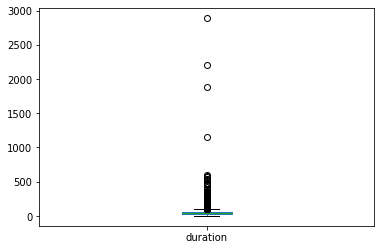

In [393]:
df_x1['duration'].plot.box()

<AxesSubplot:>

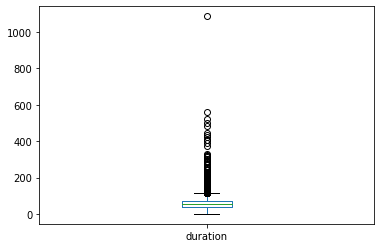

In [394]:
df_team['duration'].plot.box()

<span style="font-size:larger;">Remoção de outliers</span>

As próximas células serão referente a remoção de outliers, para tal usaremos a técnica tukey para identificar e remover os outliers de df_x1 e df_team.

<AxesSubplot:>

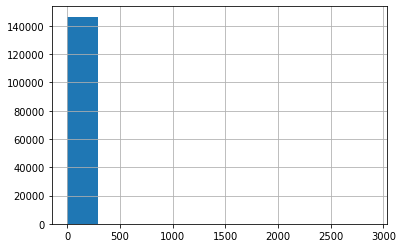

In [395]:
df_x1['duration'].hist()

<AxesSubplot:>

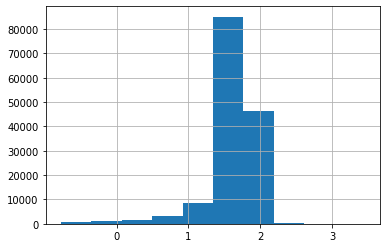

In [396]:
from numpy import log10

df_x1['duration_log']=log10(df_x1['duration'])
df_x1['duration_log'].hist()

In [397]:
q1 = df_x1['duration_log'].quantile(q=0.25)
q3 = df_x1['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.2539196343633372

In [398]:
low_outliers = df_x1[df_x1['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,duration_log
183695,78,44697899,b2a63f4a-5843-e04d-9e97-a37f7366eb60,2,0,0.166667,True,Malay,Mayans,1728.5,Mayans,Malay,2.0,-0.778151
60635,9,43077400,452f9c6f-29b7-0142-ae94-5915576b2aa5,2,0,0.166667,False,Tatars,Lithuanians,1658.5,Tatars,Lithuanians,1.0,-0.778151
242991,78,45548750,3d216753-69cb-6747-a4b1-14e24cb5d629,2,0,0.166667,True,Malay,Mongols,1264.5,Malay,Mongols,1.0,-0.778151
320104,29,46705085,5e3f3ca0-769e-8f44-9177-9fa5f3d5525d,2,0,0.166667,False,Portuguese,Celts,1178.0,Celts,Portuguese,2.0,-0.778151
154801,85,44306827,60132994-e3e8-fb40-be22-9c1c9b98dd33,2,0,0.166667,True,Cumans,Japanese,861.5,Cumans,Japanese,1.0,-0.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28110,87,42630955,7183233e-9ed4-1341-a981-c333c4ca9185,2,0,14.366667,False,Teutons,Teutons,557.0,Teutons,Teutons,2.0,1.157356
300442,9,46408719,ef9331bf-3332-8a48-b3cf-1c259f1e8bb8,2,0,14.366667,False,Mayans,Lithuanians,1176.0,Mayans,Lithuanians,1.0,1.157356
220882,9,45269782,f2168cb1-bfc0-c04e-a12d-96de734d7e1e,2,0,14.366667,False,Goths,Vikings,854.0,Vikings,Goths,2.0,1.157356
20404,87,42514963,c7a18f55-3611-f64f-8688-ab16e1dd9a50,2,0,14.366667,False,Goths,Persians,898.0,Goths,Persians,1.0,1.157356


In [399]:
high_outliers =  df_x1[ df_x1['duration_log'] > (q3+1.5*iqr)]

high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,duration_log
65218,9,43163289,e5fa715f-cf84-ee47-8310-4898197aa4d6,2,0,149.000000,False,Mongols,Britons,862.0,Britons,Mongols,2.0,2.173186
246510,78,45612024,7b8f66d5-33e8-cc46-9687-d558d9fa3940,2,0,149.200000,True,Malay,Malay,1339.0,None,None,NaN,2.173769
124377,29,43928256,dd13b96a-f102-924f-a4e2-9804d0d35334,2,0,149.366667,False,Huns,Celts,889.5,Huns,Celts,1.0,2.174254
368166,9,47371160,a8d8a5eb-8379-dc4b-8c98-20fa9494721d,2,0,149.400000,False,Ethiopians,Aztecs,1080.0,Aztecs,Ethiopians,2.0,2.174351
198908,10,44911134,8f042e11-f533-ac4e-8fe7-9653deea4e23,2,0,149.566667,True,Malay,Saracens,944.5,Malay,Saracens,1.0,2.174835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10329,72,42384294,efb56645-93e6-b04d-bda2-e0372a92c32f,2,0,595.466667,False,Celts,Celts,1921.0,None,None,NaN,2.774857
274899,29,45974510,a9c35929-fb80-884d-87f1-20885afc0991,2,0,1151.633333,False,Mongols,Mongols,987.0,Mongols,Mongols,2.0,3.061314
245576,29,45600221,6825cbc8-0851-0f4d-b14a-7818e3124755,2,0,1883.800000,False,Portuguese,Portuguese,943.5,None,None,NaN,3.275035
371201,9,47414297,bb0c143d-1426-2845-815e-cd7680ee7663,2,0,2209.233333,False,Ethiopians,Tatars,917.0,Ethiopians,Tatars,1.0,3.344242


In [400]:
df_x1 = df_x1[(df_x1['duration_log'] < (q3+1.5*iqr)) & (df_x1['duration_log'] > (q1-1.5*iqr))]

df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,duration_log
170045,140,44522576,e6013cba-9036-aa48-8bd6-896acf2edc66,2,0,14.400000,True,Malay,Huns,997.5,Malay,Huns,1.0,1.158362
192760,9,44799509,72614991-66ce-7345-afce-b26286bb0378,2,0,14.400000,False,Goths,Teutons,1355.0,Teutons,Goths,2.0,1.158362
53752,9,43007779,5d4847b1-3509-0b4c-b737-c23c3571b50d,2,0,14.400000,False,Magyars,Celts,1461.0,Magyars,Celts,1.0,1.158362
290193,29,46247151,b4a553af-6b1e-a044-bb66-fce9ecd2214d,2,0,14.400000,False,Teutons,Ethiopians,1387.0,Ethiopians,Teutons,2.0,1.158362
162540,78,44427769,114cdce2-7985-8c49-ba13-59f28dd036ac,2,0,14.400000,True,Huns,Khmer,1403.0,Khmer,Huns,2.0,1.158362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256147,9,45745996,6bf2337f-dc11-2344-984b-d6da83426355,2,0,148.800000,False,Britons,Malians,1062.0,Britons,Malians,1.0,2.172603
355481,9,47173444,ac951fe8-dff4-fe4a-a7a8-5180e071b853,2,0,148.866667,False,Mongols,Spanish,898.5,Spanish,Mongols,2.0,2.172797
95687,85,43506920,d5ff6a99-3bed-534f-858f-bad38f1601ae,2,0,148.900000,True,Ethiopians,Teutons,671.0,Ethiopians,Teutons,1.0,2.172895
110662,85,43709918,9d4c8ff9-8f94-3c4f-9936-e0174e267b85,2,0,148.900000,True,Italians,Portuguese,971.0,Portuguese,Italians,2.0,2.172895


In [401]:
df_x1=df_x1.drop('duration_log', 1)

<span style="font-size:larger;">
    Agora faremos a remoção dos outliers da coluna de duração em df_team.
</span>

<AxesSubplot:>

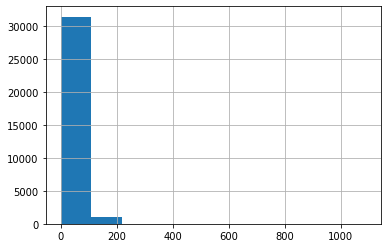

In [402]:
df_team['duration'].hist()

<AxesSubplot:>

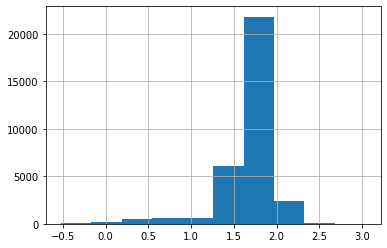

In [403]:
df_team['duration_log']=log10(df_team['duration'])
df_team['duration_log'].hist()

In [404]:
q1 = df_team['duration_log'].quantile(q=0.25)
q3 = df_team['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.2394694626103817

In [405]:
low_outliers = df_team[df_team['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam,duration_log
95920,9,43507566,dfc907a8-ad90-4640-b47d-29000c66dacd,4,0,0.300000,False,Celts,Chinese,NaN,NaN,Britons,Mayans,NaN,NaN,1099.000000,Britons,Mayans,Celts,Chinese,2.0,-0.522879
245345,23,45599414,168698f0-dbfa-e348-b8ea-5072e9d08d96,4,0,0.333333,False,Persians,Vikings,NaN,NaN,Britons,Magyars,NaN,NaN,984.500000,Persians,Vikings,Britons,Magyars,1.0,-0.477121
223359,67,45300656,dc856355-6256-f146-a676-8312280ee36e,4,0,0.333333,False,Tatars,Celts,NaN,NaN,Spanish,Burmese,NaN,NaN,1222.250000,Tatars,Celts,Spanish,Burmese,1.0,-0.477121
223423,86,45300826,50bf840f-e495-e94f-9acd-9fc9aa50d38b,4,0,0.333333,False,Celts,Turks,NaN,NaN,Burmese,Spanish,NaN,NaN,1231.000000,Burmese,Spanish,Celts,Turks,2.0,-0.477121
325830,33,46767162,6f88aca2-65e9-8645-aab5-3ae55ecf22e3,4,0,0.366667,True,Franks,Khmer,NaN,NaN,Italians,Franks,NaN,NaN,856.250000,Franks,Khmer,Italians,Franks,1.0,-0.435729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177855,67,44602007,b39308fb-1afb-4343-a7f0-4dc2733651f8,4,0,17.800000,False,Franks,Byzantines,NaN,NaN,Berbers,Tatars,NaN,NaN,2154.000000,Franks,Byzantines,Berbers,Tatars,1.0,1.250420
317106,9,46677535,b2f9cf90-bd80-554a-8e6c-7641a5ead57e,4,0,17.800000,False,Aztecs,Magyars,NaN,NaN,Ethiopians,Aztecs,NaN,NaN,1541.250000,Ethiopians,Aztecs,Aztecs,Magyars,2.0,1.250420
131311,9,44018485,dcda81f6-885c-c044-84bb-f801a40f5349,4,0,17.800000,False,Indians,Goths,NaN,NaN,Huns,Goths,NaN,NaN,1731.000000,Huns,Goths,Indians,Goths,2.0,1.250420
6785,72,42356136,97c25874-159e-0a47-b543-8658b5a6f1aa,4,0,17.800000,False,Aztecs,Portuguese,NaN,NaN,Lithuanians,Persians,NaN,NaN,879.333333,Lithuanians,Persians,Aztecs,Portuguese,2.0,1.250420


In [406]:
high_outliers =  df_team[ df_team['duration_log'] > (q3+1.5*iqr)]
high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam,duration_log
27249,74,42616324,49439d55-146b-6749-a2de-4c048f54f52d,4,0,162.466667,False,Mayans,Persians,NaN,NaN,Chinese,Franks,NaN,NaN,962.500000,Chinese,Franks,Mayans,Persians,2.0,2.210764
214013,12,45144012,9746bc23-c982-dc42-8b9a-cd79b0ce3aaa,4,1,163.000000,False,Spanish,Turks,NaN,NaN,Celts,Mongols,NaN,NaN,1934.000000,Celts,Mongols,Spanish,Turks,2.0,2.212188
381805,77,47597402,82f59d9e-a718-404c-af44-ad48241535ee,4,0,163.033333,True,Berbers,Byzantines,NaN,NaN,Persians,Tatars,NaN,NaN,1123.000000,Berbers,Byzantines,Persians,Tatars,1.0,2.212276
393597,141,47794617,4e6eae32-9368-1149-951e-bf6f7332ec31,4,0,163.266667,False,Mongols,Japanese,NaN,NaN,Spanish,Berbers,NaN,NaN,1457.000000,Mongols,Japanese,Spanish,Berbers,1.0,2.212898
297327,12,46349064,1773d4c8-5a52-334e-8af0-cb91611664a5,4,1,163.400000,False,Japanese,Persians,NaN,NaN,Byzantines,Huns,NaN,NaN,920.666667,Japanese,Persians,Byzantines,Huns,1.0,2.213252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304020,9,46499902,a2be6df6-a4a1-8d4d-8f4a-f2e1d8b495bb,4,0,481.066667,False,Franks,Saracens,NaN,NaN,Britons,Huns,NaN,NaN,1922.750000,Britons,Huns,Franks,Saracens,2.0,2.682205
118693,72,43818528,0b64f339-674a-af4f-a906-d15639208a25,4,0,498.066667,False,Italians,Franks,NaN,NaN,Malay,Saracens,NaN,NaN,824.500000,Malay,Saracens,Italians,Franks,2.0,2.697287
245262,12,45599135,3bedb3af-eab1-1d4c-a815-48ba93ac0a98,4,1,523.300000,False,Cumans,Franks,NaN,NaN,Khmer,Mongols,NaN,NaN,1675.500000,Khmer,Mongols,Cumans,Franks,2.0,2.718751
266598,29,45871796,ac3b8a68-47fc-e745-a3ca-251cf68999e8,4,0,562.633333,False,Vietnamese,Khmer,NaN,NaN,Khmer,Ethiopians,NaN,NaN,2116.250000,Khmer,Ethiopians,Vietnamese,Khmer,2.0,2.750225


In [407]:
df_team = df_team[(df_team['duration_log'] < (q3+1.5*iqr)) & (df_team['duration_log'] > (q1-1.5*iqr))]

df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam,duration_log
369933,9,47383918,2ef953bc-6041-ad4a-89a2-ce55ad6c897b,4,0,17.833333,False,Lithuanians,Huns,NaN,NaN,Franks,Persians,NaN,NaN,1294.00,Lithuanians,Huns,Franks,Persians,1.0,1.251233
267691,9,45901427,08d9792a-9bf8-8149-ae58-2d2bc92b748f,4,0,17.866667,False,Britons,Franks,NaN,NaN,Britons,Khmer,NaN,NaN,2758.00,Britons,Franks,Britons,Khmer,1.0,1.252044
113462,87,43758958,802d7754-72eb-c44e-8135-0176d21bda66,4,0,17.866667,False,Teutons,Britons,NaN,NaN,Slavs,Ethiopians,NaN,NaN,1568.00,Slavs,Ethiopians,Teutons,Britons,2.0,1.252044
81495,72,43340903,d8e45521-a9a7-a046-a691-008efe554ec0,4,0,17.866667,False,Teutons,Britons,NaN,NaN,Slavs,Bulgarians,NaN,NaN,1685.25,Teutons,Britons,Slavs,Bulgarians,1.0,1.252044
34923,9,42705240,c1643928-e17d-c54d-9a77-7fb9738a5843,4,0,17.900000,False,Lithuanians,Ethiopians,NaN,NaN,Khmer,Persians,NaN,NaN,1480.00,Lithuanians,Ethiopians,Khmer,Persians,1.0,1.252853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147375,74,44238638,a165e72b-f1e8-c743-b382-524678f477f2,4,0,161.000000,False,Aztecs,Goths,NaN,NaN,Magyars,Huns,NaN,NaN,1031.50,Aztecs,Goths,Magyars,Huns,1.0,2.206826
337830,9,46921897,e8167aa8-65d1-2b43-8ebc-66a17aaffbfd,4,0,161.166667,False,Franks,Mayans,NaN,NaN,Mayans,Magyars,NaN,NaN,1267.25,Franks,Mayans,Mayans,Magyars,1.0,2.207275
143720,9,44170208,72f3cbbe-e448-cc4b-9382-3e9f74e053a5,4,0,161.200000,False,Chinese,Slavs,NaN,NaN,Goths,Berbers,NaN,NaN,980.50,Goths,Berbers,Chinese,Slavs,2.0,2.207365
360280,72,47225312,eac6744c-4cd0-2743-a91b-6e620b2204d5,4,0,161.266667,False,Malay,Malians,NaN,NaN,Portuguese,Khmer,NaN,NaN,1002.50,Malay,Malians,Portuguese,Khmer,1.0,2.207545


In [408]:
df_team=df_team.drop('duration_log', 1)

<AxesSubplot:>

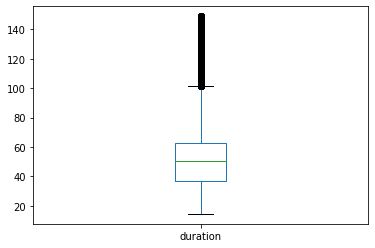

In [409]:
df_x1['duration'].plot.box()

<AxesSubplot:>

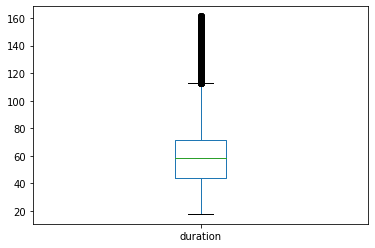

In [410]:
df_team['duration'].plot.box()

<span style="font-size:larger;">
    Partidas de 170 a 120 minutos, dentro do jogo, são partidas longas, mas ainda dentro da normalidade.
</span>

<span style="font-size:larger;">Vamos verificar agora a coluna de average rating</span>

<AxesSubplot:>

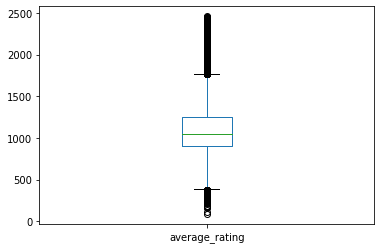

In [411]:
df_x1['average_rating'].plot.box()

<AxesSubplot:>

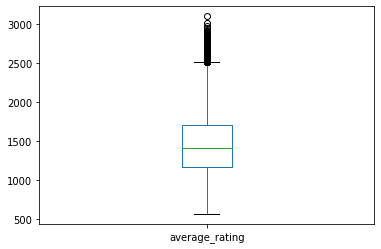

In [412]:
df_team['average_rating'].plot.box()

<span style="font-size:larger;">
    Por mais que sejam de fato pontos fora da curva, esses dados estão corretos, a situação é que há alguns 
    jogadores com classificação muito alta e outros com classificação muito baixa.
</span>

<span style="font-size:larger;">
    Normalização.
</span>

Vamos normalizar a coluna de "average_rating" nos DataFrames

In [413]:
df_x1['average_rating_normalized'] = (df_x1['average_rating'] - df_x1['average_rating'].min()) / (df_x1['average_rating'].max() - df_x1['average_rating'].min())
df_x1.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,average_rating_normalized
380271,29,47584341,279f29e4-d5d0-0f4c-a543-f9ff5983da65,2,0,66.333333,False,Huns,Teutons,87.0,Teutons,Huns,2.0,0.000000
316625,29,46665643,e7f74f41-3e25-a645-9a56-0c55f1c9c995,2,0,33.033333,False,Teutons,Britons,111.5,Teutons,Britons,1.0,0.010333
93399,17,43485516,fe8f26ce-59a4-334d-af7f-5766a328eb06,2,0,35.966667,False,Mongols,Franks,160.0,Mongols,Franks,1.0,0.030789
366974,77,47351961,05de78ea-938a-8248-bba7-822d548eb161,2,0,69.166667,True,Celts,Teutons,168.5,Teutons,Celts,2.0,0.034374
349200,29,47076649,606c75dc-e840-dd4d-b575-e4f9b2b9fe10,2,0,112.566667,False,Portuguese,Teutons,171.0,Teutons,Portuguese,2.0,0.035428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84894,9,43377027,1f99405c-bc4d-9a42-8f60-bef30926a67c,2,0,53.466667,False,Vietnamese,Cumans,2443.0,Vietnamese,Cumans,1.0,0.993674
180168,32,44637292,4b47c122-080c-0a45-8fad-80c834fa8a20,2,0,41.466667,False,Khmer,Saracens,2451.0,Khmer,Saracens,1.0,0.997048
192252,9,44797849,52fd5313-cb82-8345-aafe-7b913078456e,2,0,58.300000,False,Britons,Byzantines,2452.0,Britons,Byzantines,1.0,0.997469
193460,78,44817257,a9958d29-afb6-ec49-9367-2246a518f9ba,2,0,51.933333,True,Slavs,Bulgarians,2454.5,Bulgarians,Slavs,2.0,0.998524


In [414]:
df_team['average_rating_normalized'] = (df_team['average_rating'] - df_team['average_rating'].min()) / (df_team['average_rating'].max() - df_team['average_rating'].min())
df_team.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam,average_rating_normalized
395603,77,47815107,b1f4e01d-da95-f04d-9ca2-c7950ffc2f34,4,0,117.800000,True,Franks,Portuguese,NaN,NaN,Britons,Khmer,NaN,NaN,565.00,Britons,Khmer,Franks,Portuguese,2.0,0.000000
77435,12,43308978,466b37f2-5a19-c040-b0b1-2334c92afeee,4,1,79.466667,False,Bulgarians,Chinese,NaN,NaN,Cumans,Khmer,NaN,NaN,593.00,Bulgarians,Chinese,Cumans,Khmer,1.0,0.011029
244324,12,45585032,838d1c30-5ea2-0248-b68b-6d46abe361ec,4,1,62.700000,False,Magyars,Teutons,NaN,NaN,Goths,Persians,NaN,NaN,594.00,Magyars,Teutons,Goths,Persians,1.0,0.011423
390942,9,47775445,48999e37-b950-c447-b22d-5b404399f3c1,4,0,120.633333,False,Franks,Magyars,NaN,NaN,Khmer,Britons,NaN,NaN,594.00,Khmer,Britons,Franks,Magyars,2.0,0.011423
183257,12,44696358,7b175268-bc9f-6748-a5ea-85bf0aa18c3b,4,1,82.433333,False,Persians,Teutons,NaN,NaN,Japanese,Mongols,NaN,NaN,600.00,Japanese,Mongols,Persians,Teutons,2.0,0.013786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399870,9,47896063,ed8bfa92-abf5-3549-8408-fc787dbda337,4,0,21.233333,False,Chinese,Franks,NaN,NaN,Britons,Khmer,NaN,NaN,2923.50,Britons,Khmer,Chinese,Franks,2.0,0.929000
274067,9,45971881,9964f3a0-e65f-0243-ad16-0805cf969ecd,4,0,41.200000,False,Japanese,Celts,NaN,NaN,Aztecs,Saracens,NaN,NaN,2959.00,Aztecs,Saracens,Japanese,Celts,2.0,0.942984
282813,9,46123081,efaf6ce8-c281-3342-91b1-4a49a0a484cb,4,0,66.700000,False,Indians,Britons,NaN,NaN,Indians,Britons,NaN,NaN,2975.50,Indians,Britons,Indians,Britons,1.0,0.949483
339602,11,46964155,f608982a-de7e-7245-a969-e7ab19d433d1,4,0,43.933333,True,Vikings,Italians,NaN,NaN,Italians,Vikings,NaN,NaN,3021.00,Vikings,Italians,Italians,Vikings,1.0,0.967405


<span style="font-size:larger;">
    Discretização.
</span>

Vamos discretizar a coluna de "duration" nos DataFrames, e classificar as partidas entre: curta, média e longa duração.

In [415]:
duration_class = ['short','medium','long']
df_x1['duration'] = pandas.cut(df_x1['duration'],3,labels = duration_class)
df_x1['duration'].value_counts()

short     94099
medium    41221
long       2055
Name: duration, dtype: int64

In [416]:
df_x1['duration']=df_x1['duration'].astype('category')

In [417]:
df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,average_rating_normalized
196416,9,44878998,ae35ba76-57f1-5b48-97d9-c44a8c748e98,2,0,short,False,Lithuanians,Franks,917.5,Lithuanians,Franks,1.0,0.350274
239355,9,45492432,006fe3c1-990e-0a47-abd3-77219906b736,2,0,short,False,Goths,Malay,1431.0,Malay,Goths,2.0,0.566849
239348,10,45492347,9e8fb329-e5c6-dd40-9fb2-10669df1c2fe,2,0,short,True,Vikings,Vikings,991.5,Vikings,Vikings,2.0,0.381485
239347,140,45492364,0619ba89-b91f-6843-8f38-e7681c83f080,2,0,short,True,Mayans,Japanese,913.5,Japanese,Mayans,2.0,0.348587
239337,9,45492346,ec168004-a23f-fc49-b55e-f51021ef40ad,2,0,short,False,Khmer,Malians,1744.5,Khmer,Malians,1.0,0.699072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79913,9,43329795,b5b84f7e-b1a1-ee41-a1ad-2311ad979333,2,0,long,False,Lithuanians,Mayans,759.5,Mayans,Lithuanians,2.0,0.283636
12637,9,42412087,9df657eb-47a4-ff44-9dba-39822ebad087,2,0,long,False,Japanese,Mongols,1104.0,Japanese,Mongols,1.0,0.428933
34333,9,42703346,3ecb109c-a4cc-d244-a26c-167a42ff66fd,2,0,long,False,Italians,Celts,713.0,Celts,Italians,2.0,0.264024
286914,9,46166024,de44a572-2325-d044-a999-b0adb661cf6e,2,0,long,False,Byzantines,Franks,1326.0,Byzantines,Franks,1.0,0.522564


In [418]:
duration_class = ['short','medium','long']
df_team['duration'] = pandas.cut(df_team['duration'],3,labels = duration_class)
df_team['duration'].value_counts()

short     19730
medium     9835
long        709
Name: duration, dtype: int64

In [419]:
df_team['duration']=df_team['duration'].astype('category')

In [420]:
df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam,average_rating_normalized
19,77,42282604,1221efe9-f961-f042-af84-debe1b032c6a,4,0,short,True,Celts,Persians,NaN,NaN,Franks,Mayans,NaN,NaN,1325.750000,Franks,Mayans,Celts,Persians,2.0,0.299655
242140,9,45545760,1524eb55-4056-3b4e-9da7-6430c56367ce,4,0,short,False,Celts,Malay,NaN,NaN,Mayans,Persians,NaN,NaN,1201.000000,Mayans,Persians,Celts,Malay,2.0,0.250517
242119,9,45545736,7d6fe360-0a9a-0e42-a8de-36bc53da15d5,4,0,short,False,Khmer,Tatars,NaN,NaN,Turks,Huns,NaN,NaN,1346.500000,Turks,Huns,Khmer,Tatars,2.0,0.307829
242112,9,45545607,c0abd120-202a-de41-b3d5-60ae56648646,4,0,short,False,Ethiopians,Lithuanians,NaN,NaN,Teutons,Burmese,NaN,NaN,1264.500000,Teutons,Burmese,Ethiopians,Lithuanians,2.0,0.275529
242101,9,45545652,af80bd3d-6792-114b-8936-e3c3df1405e6,4,0,short,False,Malians,Teutons,NaN,NaN,Mayans,Mongols,NaN,NaN,1885.000000,Mayans,Mongols,Malians,Teutons,2.0,0.519941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,16,43049236,9fe6b1ae-fcd0-7f43-b4da-054df85ede7a,4,0,long,False,Vikings,Magyars,NaN,NaN,Goths,Magyars,NaN,NaN,1095.500000,Goths,Magyars,Vikings,Magyars,2.0,0.208961
387973,9,47731434,d3eced69-bf19-3a49-bd18-1bfc91430603,4,0,long,False,Persians,Mayans,NaN,NaN,Magyars,Mongols,NaN,NaN,1451.750000,Magyars,Mongols,Persians,Mayans,2.0,0.349286
271159,9,45949361,53125f29-a60d-8c46-a699-16a5a7bd5eb8,4,0,long,False,Mayans,Khmer,NaN,NaN,Celts,Khmer,NaN,NaN,915.666667,Celts,Khmer,Mayans,Khmer,2.0,0.138126
270706,12,45943280,32034752-1781-894c-bd58-331e4c2e3526,4,1,long,False,Persians,Britons,NaN,NaN,Portuguese,Magyars,NaN,NaN,814.500000,Persians,Britons,Portuguese,Magyars,1.0,0.098277


In [421]:
df_x1=df_x1.reset_index().drop('index', 1)

In [422]:
df_team=df_team.reset_index().drop('index', 1)

In [423]:
df_team_2x2=df_team[df_team['num_players'] == 4]

In [424]:
df_team_2x2['average_rating'].describe()

count    30274.000000
mean      1467.089210
std        409.761772
min        565.000000
25%       1165.250000
50%       1407.500000
75%       1704.000000
max       3103.750000
Name: average_rating, dtype: float64

In [425]:
df_team_2x2=df_team_2x2[df_team_2x2['average_rating'] >= 1164.750000]

<AxesSubplot:>

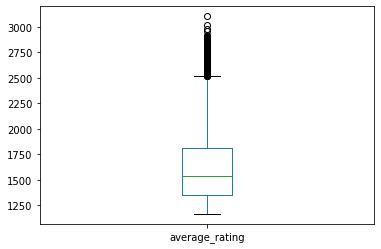

In [426]:
df_team_2x2['average_rating'].plot.box()

In [427]:
df_team_2x2=df_team_2x2.drop(['map_type', 'match_id', 'match_uuid', 'visibility', 'duration', 'num_players', 'wCiv3', 'wCiv4', 'lCiv3', 'lCiv4', 'average_rating', 'average_rating_normalized'], 1)

In [428]:
df_team_2x2=df_team_2x2.reset_index().drop('index', 1)

In [429]:
df_team_2x2

,has_relevant_water,wCiv1,wCiv2,lCiv1,lCiv2,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam
0,True,Celts,Persians,Franks,Mayans,Franks,Mayans,Celts,Persians,2.0
1,False,Vikings,Britons,Spanish,Saracens,Vikings,Britons,Spanish,Saracens,1.0
2,False,Huns,Mayans,Indians,Incas,Huns,Mayans,Indians,Incas,1.0
3,False,Bulgarians,Celts,Goths,Magyars,Goths,Magyars,Bulgarians,Celts,2.0
4,False,Celts,Khmer,Britons,Khmer,Celts,Khmer,Britons,Khmer,1.0
...,...,...,...,...,...,...,...,...,...,...
22715,False,Britons,Bulgarians,Malians,Slavs,Britons,Bulgarians,Malians,Slavs,1.0
22716,True,Vikings,Spanish,Indians,Mayans,Vikings,Spanish,Indians,Mayans,1.0
22717,False,Vietnamese,Persians,Mongols,Persians,Vietnamese,Persians,Mongols,Persians,1.0
22718,False,Franks,Mongols,Vikings,Franks,Vikings,Franks,Franks,Mongols,2.0


In [430]:
df_team_2x2=df_team_2x2.drop(['wCiv1', 'wCiv2', 'lCiv1', 'lCiv2'], 1)

In [431]:
df_team_2x2

,has_relevant_water,Team1Civ1,Team1Civ2,Team2Civ1,Team2Civ2,VictoriousTeam
0,True,Franks,Mayans,Celts,Persians,2.0
1,False,Vikings,Britons,Spanish,Saracens,1.0
2,False,Huns,Mayans,Indians,Incas,1.0
3,False,Goths,Magyars,Bulgarians,Celts,2.0
4,False,Celts,Khmer,Britons,Khmer,1.0
...,...,...,...,...,...,...
22715,False,Britons,Bulgarians,Malians,Slavs,1.0
22716,True,Vikings,Spanish,Indians,Mayans,1.0
22717,False,Vietnamese,Persians,Mongols,Persians,1.0
22718,False,Vikings,Franks,Franks,Mongols,2.0


In [432]:
df_team_2x2.to_json('../2x2_matches_dataset_corrected.json')

<AxesSubplot:>

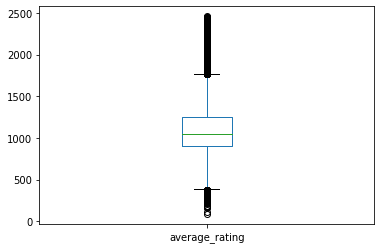

In [433]:
df_x1['average_rating'].plot.box()

In [434]:
df_x1['average_rating'].describe()

count    137375.000000
mean       1096.315560
std         280.998149
min          87.000000
25%         899.000000
50%        1052.000000
75%        1246.000000
max        2458.000000
Name: average_rating, dtype: float64

In [435]:
df_x1=df_x1[df_x1['average_rating'] >= 1052.000000]

<AxesSubplot:>

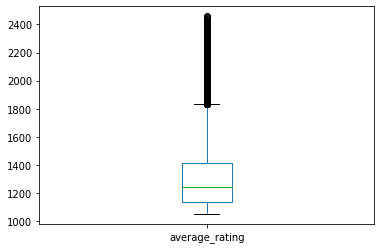

In [436]:
df_x1['average_rating'].plot.box()

In [437]:
df_x1

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,Team1,Team2,VictoriousTeam,average_rating_normalized
0,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,0,medium,False,Magyars,Franks,1238.0,Magyars,Franks,1.0,0.485449
1,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,0,short,False,Slavs,Mayans,1085.0,Slavs,Mayans,1.0,0.420919
2,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,0,short,False,Chinese,Byzantines,1247.5,Byzantines,Chinese,2.0,0.489456
4,9,42282625,17f5da6f-058b-8f4c-ab60-170152c3899e,2,0,short,False,Huns,Mayans,1087.0,Mayans,Huns,2.0,0.421763
5,29,42282616,7ddfe077-d980-d64e-a0b0-37a038bda3be,2,0,short,False,Byzantines,Saracens,1379.0,Saracens,Byzantines,2.0,0.544918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137363,75,47896458,f435da29-b538-ed48-9992-1e952daa61fd,2,0,short,False,Mongols,Berbers,1064.5,Mongols,Berbers,1.0,0.412273
137367,75,47896534,c0b0de12-9711-164c-ad0d-cae9c13a8f57,2,0,short,False,Cumans,Spanish,1143.5,Spanish,Cumans,2.0,0.445593
137371,9,47896609,319b75e9-590a-0b49-811b-b8f2360d8ebf,2,0,short,False,Aztecs,Mongols,1555.0,Mongols,Aztecs,2.0,0.619148
137372,9,47896625,8ec9b696-a424-f446-ae0d-8a652583e84e,2,0,medium,False,Incas,Franks,1230.5,Franks,Incas,2.0,0.482286


In [438]:
df_x1=df_x1.drop(['map_type', 'match_id', 'match_uuid', 'visibility', 'num_players', 'average_rating', 'average_rating_normalized', 'VictoriousTeam'], 1)

In [439]:
df_x1

,duration,has_relevant_water,wCiv,lCiv,Team1,Team2
0,medium,False,Magyars,Franks,Magyars,Franks
1,short,False,Slavs,Mayans,Slavs,Mayans
2,short,False,Chinese,Byzantines,Byzantines,Chinese
4,short,False,Huns,Mayans,Mayans,Huns
5,short,False,Byzantines,Saracens,Saracens,Byzantines
...,...,...,...,...,...,...
137363,short,False,Mongols,Berbers,Mongols,Berbers
137367,short,False,Cumans,Spanish,Spanish,Cumans
137371,short,False,Aztecs,Mongols,Mongols,Aztecs
137372,medium,False,Incas,Franks,Franks,Incas


In [440]:
df_x1=df_x1.drop(['wCiv', 'lCiv'], 1)

In [441]:
df_x1

,duration,has_relevant_water,Team1,Team2
0,medium,False,Magyars,Franks
1,short,False,Slavs,Mayans
2,short,False,Byzantines,Chinese
4,short,False,Mayans,Huns
5,short,False,Saracens,Byzantines
...,...,...,...,...
137363,short,False,Mongols,Berbers
137367,short,False,Spanish,Cumans
137371,short,False,Mongols,Aztecs
137372,medium,False,Franks,Incas


<p>Dado que vamos prever a duração das partidas, o conteúdo dessas linhas não ser "None" é muito importante, não há como prever o andamento da partida sem saber as civilizações que nela jogaram.<br>
Também nota-se que a perda é muito pequena.</p>

In [442]:
df_x1=df_x1.dropna()

In [443]:
df_x1

,duration,has_relevant_water,Team1,Team2
0,medium,False,Magyars,Franks
1,short,False,Slavs,Mayans
2,short,False,Byzantines,Chinese
4,short,False,Mayans,Huns
5,short,False,Saracens,Byzantines
...,...,...,...,...
137363,short,False,Mongols,Berbers
137367,short,False,Spanish,Cumans
137371,short,False,Mongols,Aztecs
137372,medium,False,Franks,Incas


In [444]:
df_x1.to_json('../1x1_matches_dataset_corrected.json')